In [1]:
# 📦 Step 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv("./insurance.csv")

print(df.head())
print(df.info())
print(df.isnull().sum())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges

In [3]:
# Define target and features
target_col = 'charges'  # Replace with your actual target column

In [4]:
len(list(df.columns))

7

In [ ]:
# --- 1. Remove duplicates ---
df.drop_duplicates(inplace=True)

# --- 2. Standardize column names ---
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# --- 3. Handle missing values ---
# Drop rows where more than 30% of the values are missing
df.dropna(thresh=int(0.7 * len(df.columns)), inplace=True)

# Optional: Preview the cleaned DataFrame
print("✅ Cleaned DataFrame Shape:", df.shape)
print(df.head())

In [ ]:
X = df.drop(columns=[target_col])
y = df[target_col]

# Identify column types
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()


In [6]:
from sklearn.compose import make_column_transformer

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', StandardScaler(), numerical_cols)
])


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
linear_pipe = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])

linear_pipe.fit(X_train, y_train)
y_pred_lr = linear_pipe.predict(X_test)

print("📊 Linear Regression")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R² Score:", r2_score(y_test, y_pred_lr))


📊 Linear Regression
RMSE: 5796.2846592762735
R² Score: 0.7835929767120723


In [11]:
poly_pipe = Pipeline([
    ('preprocess', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('regressor', LinearRegression())
])

poly_pipe.fit(X_train, y_train)
y_pred_poly = poly_pipe.predict(X_test)

print("📊 Polynomial Regression (degree=2)")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))
print("R² Score:", r2_score(y_test, y_pred_poly))


📊 Polynomial Regression (degree=2)
RMSE: 4551.132385233192
R² Score: 0.8665830903164841


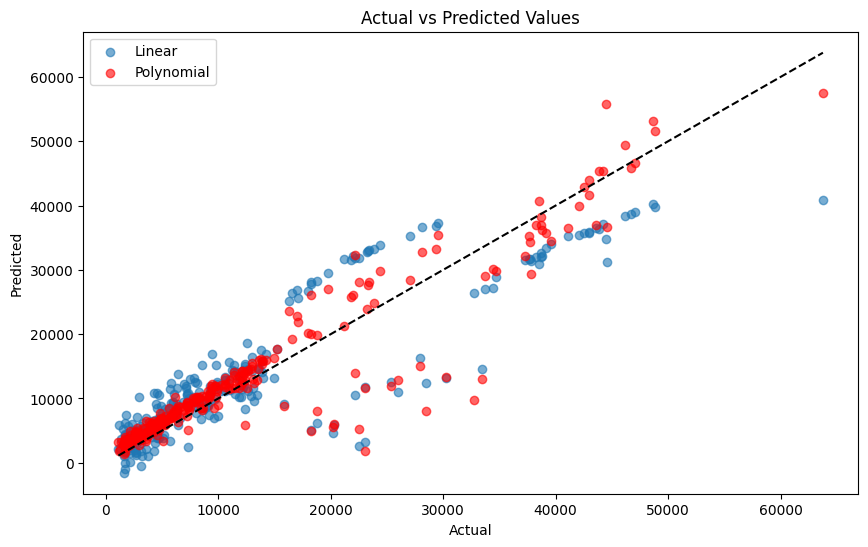

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, label='Linear', alpha=0.6)
plt.scatter(y_test, y_pred_poly, label='Polynomial', alpha=0.6, color='red')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()
